In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from hagelslag.evaluation import DistributedROC, DistributedReliability
from scipy.ndimage import convolve
from scipy.spatial import cKDTree
from glob import glob
import xarray as xr
import os
from os.path import join

In [95]:
eval_path = "/glade/p/work/dgagne/ncar_coarse_neighbor_eval_2016/"
eval_files = sorted(os.listdir(eval_path))
eval_test = pd.read_csv(join(eval_path, eval_files[0]))
models = eval_test.columns[eval_test.columns.str.contains("mean")]
run_dates = pd.DatetimeIndex([e.split("_")[-1][:8] for e in eval_files])
thresholds = [25, 50, 75]
prob_thresholds = np.concatenate(([0, 0.01], np.arange(0.1, 1.1, 0.1), [1.05]))
brier = {}
roc = {}
for thresh in thresholds:
    brier[thresh] = pd.DataFrame(index=run_dates, columns=models, dtype=object)
    roc[thresh] = pd.DataFrame(index=run_dates, columns=models, dtype=object)
    #roc[thresh].loc[:, :] = DistributedROC()
    #brier[thresh].loc[:, :] = DistributedReliability()
for ev, eval_file in enumerate(eval_files):
    print(eval_file)
    eval_data = pd.read_csv(join(eval_path, eval_file))
    us_mask = eval_data["us_mask"] == 1
    for thresh in thresholds:
        obs = eval_data.loc[us_mask, "MESH_Max_60min_00.50_{0:2d}".format(thresh)]
        for model in models:
            brier[thresh].loc[run_dates[ev], model] = DistributedReliability(thresholds=prob_thresholds)
            brier[thresh].loc[run_dates[ev], model].update(eval_data.loc[us_mask, model], 
                                                           obs)
            roc[thresh].loc[run_dates[ev], model] = DistributedROC(thresholds=prob_thresholds)
            roc[thresh].loc[run_dates[ev], model].update(eval_data.loc[us_mask, model], 
                                                         obs)

coarse_neighbor_eval_NCAR_20160502.csv
coarse_neighbor_eval_NCAR_20160503.csv
coarse_neighbor_eval_NCAR_20160504.csv
coarse_neighbor_eval_NCAR_20160505.csv
coarse_neighbor_eval_NCAR_20160506.csv
coarse_neighbor_eval_NCAR_20160507.csv
coarse_neighbor_eval_NCAR_20160508.csv
coarse_neighbor_eval_NCAR_20160509.csv


KeyboardInterrupt: 

In [2]:
out_path = "/glade/p/work/dgagne/ncar_coarse_neighbor_scores_2016/"
for thresh in [25, 50, 75]:
    brier[thresh].to_csv(join(out_path, "ncar_2016_brier_objs_{0:02d}.csv".format(thresh)), index_label="Date")
    roc[thresh].to_csv(join(out_path, "ncar_2016_roc_objs_{0:02d}.csv".format(thresh)), index_label="Date")

NameError: name 'brier' is not defined

In [2]:
out_path = "/glade/p/work/dgagne/ncar_coarse_neighbor_scores_2016/"
brier = {}
roc = {}
for thresh in [25, 50]:
    print(thresh)
    brier_str = pd.read_csv(join(out_path, "ncar_2016_brier_objs_{0:02d}.csv".format(thresh)), index_col="Date")

    brier[thresh] = pd.DataFrame(index=pd.DatetimeIndex(brier_str.index), columns=brier_str.columns)
    print("Brier")
    for col in brier_str.columns:
        brier[thresh][col] = [DistributedReliability(input_str=s) for s in brier_str[col]]
    roc_str = pd.read_csv(join(out_path, "ncar_2016_roc_objs_{0:02d}.csv".format(thresh)), index_col="Date")
    roc[thresh] = pd.DataFrame(index=pd.DatetimeIndex(roc_str.index), columns=roc_str.columns)
    print("ROC")
    for col in roc_str.columns:
        roc[thresh][col] = [DistributedROC(input_str=s) for s in roc_str[col]]

25
Brier
ROC
50
Brier
ROC


In [6]:
fore_freq = pd.DataFrame(columns=brier[25].columns, index=brier[25].index, dtype=int)
for date in brier[25].index:
    for model in brier[25].columns:
        fore_freq.loc[date, model] = brier[25].loc[date, model].frequencies["Total_Freq"].sum()

In [21]:
ro = rel_objs[0]

In [26]:
ro.frequencies

,Total_Freq,Positive_Freq
0,83624,119
1,40189,145
2,23176,159
3,18270,254
4,16256,308
5,16167,467
6,16540,607
7,18413,914
8,22295,1293
9,31158,2210


In [3]:

bss = brier[25].sum(axis=0).apply(DistributedReliability.brier_skill_score)
rel_objs = brier[25].sum(axis=0)

In [28]:
rolling_brier["NCAR_HAIL_MAXK1_mean_25"]["2016-05-16"].brier_skill_score()

-0.09054204346333437

(Timestamp('2016-05-02 00:00:00'), 0.07501650766856091)
(Timestamp('2016-05-03 00:00:00'), 0.025912855565673572)
(Timestamp('2016-05-04 00:00:00'), -0.33965836581823744)
(Timestamp('2016-05-05 00:00:00'), -0.8688857454163921)
(Timestamp('2016-05-06 00:00:00'), -0.4605480885221306)
(Timestamp('2016-05-07 00:00:00'), -0.6263169059749885)
(Timestamp('2016-05-08 00:00:00'), -0.08578520818406174)
(Timestamp('2016-05-09 00:00:00'), 0.17015273073263565)
(Timestamp('2016-05-10 00:00:00'), 0.15865167885073103)
(Timestamp('2016-05-11 00:00:00'), 0.2847657329904139)
(Timestamp('2016-05-12 00:00:00'), 0.11054646347076899)
(Timestamp('2016-05-13 00:00:00'), 0.17507489952502736)
(Timestamp('2016-05-14 00:00:00'), -0.12418251184449194)
(Timestamp('2016-05-15 00:00:00'), -0.41609489455943577)
(Timestamp('2016-05-16 00:00:00'), -0.09054204346333437)
(Timestamp('2016-05-17 00:00:00'), -0.15082356577194364)
(Timestamp('2016-05-18 00:00:00'), -0.5239307105739476)
(Timestamp('2016-05-19 00:00:00'), -0.5046

ZeroDivisionError: float division by zero

In [137]:

roc_objs = roc[25].sum(axis=0)
roc_objs_50 = roc[50].sum(axis=0)

In [138]:
auc = roc_objs.apply(DistributedROC.auc)
auc_50 = roc_objs_50.apply(DistributedROC.auc)

In [5]:
thresholds = np.array([x[-1] for x in bss.index.str.split("_").values])
model_names = np.array(["_".join(x[:-2]) for x in bss.index.str.split("_").values])

In [7]:
auc

NCAR_HAIL_MAX2D_mean_5           0.750829
NCAR_HAIL_MAX2D_mean_20          0.789459
NCAR_HAIL_MAX2D_mean_25          0.799429
NCAR_HAIL_MAX2D_mean_30          0.810879
NCAR_HAIL_MAX2D_mean_35          0.816720
NCAR_HAIL_MAX2D_mean_40          0.828572
NCAR_HAIL_MAX2D_mean_45          0.834027
NCAR_HAIL_MAX2D_mean_50          0.838913
NCAR_HAIL_MAX2D_mean_75          0.823520
NCAR_HAIL_MAXK1_mean_5           0.750260
NCAR_HAIL_MAXK1_mean_20          0.778024
NCAR_HAIL_MAXK1_mean_25          0.784541
NCAR_HAIL_MAXK1_mean_30          0.786194
NCAR_HAIL_MAXK1_mean_35          0.784795
NCAR_HAIL_MAXK1_mean_40          0.774344
NCAR_HAIL_MAXK1_mean_45          0.763891
NCAR_HAIL_MAXK1_mean_50          0.744932
NCAR_HAIL_MAXK1_mean_75          0.547195
NCAR_UP_HELI_MAX_mean_5          0.828941
NCAR_UP_HELI_MAX_mean_25         0.845794
NCAR_UP_HELI_MAX_mean_50         0.811002
NCAR_UP_HELI_MAX_mean_75         0.763443
NCAR_UP_HELI_MAX_mean_100        0.716279
NCAR_UP_HELI_MAX_mean_125        0

In [12]:
rel_objs

NCAR_HAIL_MAX2D_mean_5           Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_20          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_25          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_30          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_35          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_40          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_45          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_50          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAX2D_mean_75          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAXK1_mean_5           Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAXK1_mean_20          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR_HAIL_MAXK1_mean_25          Obs_Threshold:1.00;Thresholds:0.00 0.01 0.10 0...
NCAR

NCAR_Elastic-Net
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_GRPL_MAX
['5' '10' '15' '20' '25' '30' '35' '40' '45' '50']
NCAR_HAILCAST_DIAM_MEAN
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAX2D
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAXK1
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_REFD_MAX
['50' '55' '60' '65' '70']
NCAR_Random-Forest
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_Random-Forest-CV
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_UP_HELI_MAX
['5' '25' '50' '75' '100' '125' '150' '175' '200']
NCAR_W_UP_MAX
['2' '5' '10' '20' '30' '40']


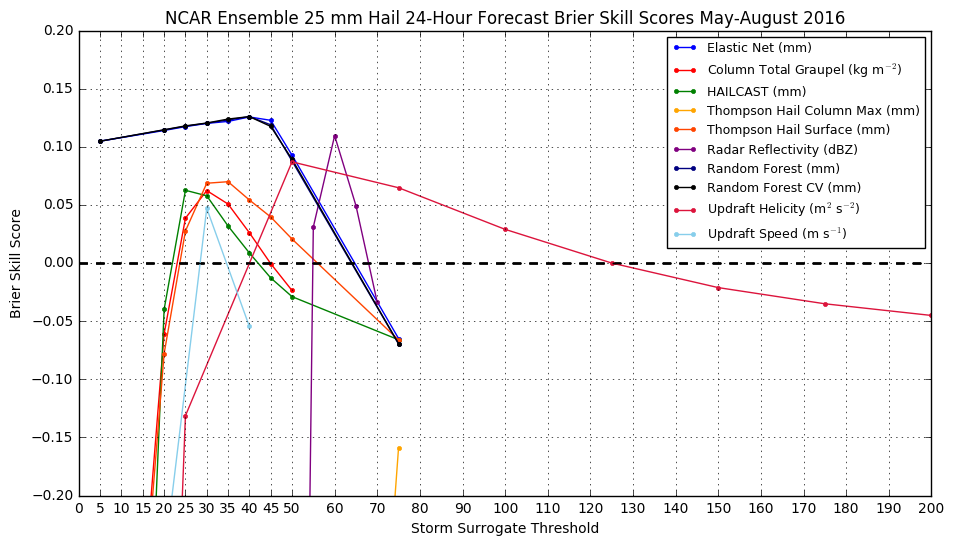

In [12]:
plt.figure(figsize=(11, 6))
colors = ["blue", "red", "green", "orange", "orangered", "purple", "navy", "black", "crimson", "skyblue"]
units = {"NCAR_Elastic-Net": "mm",
         "NCAR_Random-Forest": "mm",
         "NCAR_Random-Forest-CV": "mm",
         "NCAR_GRPL_MAX": "kg m$^{-2}$",
         "NCAR_HAILCAST_DIAM_MEAN": "mm",
         "NCAR_HAIL_MAX2D": "mm",
         "NCAR_HAIL_MAXK1": "mm",
         "NCAR_REFD_MAX": "dBZ",
         "NCAR_UP_HELI_MAX": "m$^2$ s$^{-2}$",
         "NCAR_W_UP_MAX": "m s$^{-1}$"
        }
long_names = {"NCAR_Elastic-Net": "Elastic Net",
         "NCAR_Random-Forest": "Random Forest",
         "NCAR_Random-Forest-CV": "Random Forest CV",
         "NCAR_GRPL_MAX": "Column Total Graupel",
         "NCAR_HAILCAST_DIAM_MEAN": "HAILCAST",
         "NCAR_HAIL_MAX2D": "Thompson Hail Column Max",
         "NCAR_HAIL_MAXK1": "Thompson Hail Surface",
         "NCAR_REFD_MAX": "Radar Reflectivity",
         "NCAR_UP_HELI_MAX": "Updraft Helicity",
         "NCAR_W_UP_MAX": "Updraft Speed"
        }
unique_model_names = np.sort(np.unique(model_names))
for m, model_name in enumerate(unique_model_names):
    print(model_name)
    print(thresholds[model_names == model_name])
    plt.plot(np.array(thresholds[model_names == model_name], dtype=float), 
             bss[model_names == model_name], label=long_names[model_name] + " ({0})".format(units[model_name]), 
             marker='.', color=colors[m])
    plt.plot(np.arange(200), np.zeros(200), 'k--')
plt.legend(loc=1, fontsize=9)
plt.xticks(np.concatenate((np.arange(0, 55, 5), np.arange(60, 210, 10))))
plt.grid()
plt.ylim(-0.2, 0.2)
plt.xlabel("Storm Surrogate Threshold")
plt.ylabel("Brier Skill Score")
plt.title("NCAR Ensemble 25 mm Hail 24-Hour Forecast Brier Skill Scores May-August 2016")
plt.savefig("ncar_ens_thresh_comp_bss_25.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_thresh_comp_bss_25.pdf", dpi=300, bbox_inches="tight")

NCAR_Elastic-Net
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_GRPL_MAX
['5' '10' '15' '20' '25' '30' '35' '40' '45' '50']
NCAR_HAILCAST_DIAM_MEAN
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAX2D
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAXK1
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_REFD_MAX
['50' '55' '60' '65' '70']
NCAR_Random-Forest
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_Random-Forest-CV
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_UP_HELI_MAX
['5' '25' '50' '75' '100' '125' '150' '175' '200']
NCAR_W_UP_MAX
['2' '5' '10' '20' '30' '40']


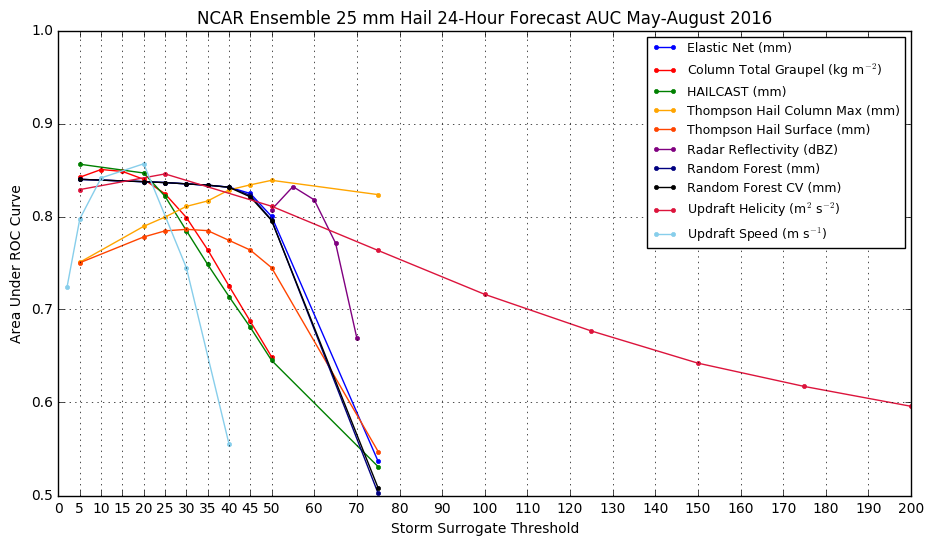

In [9]:
plt.figure(figsize=(11, 6))
colors = ["blue", "red", "green", "orange", "orangered", "purple", "navy", "black", "crimson", "skyblue"]
units = {"NCAR_Elastic-Net": "mm",
         "NCAR_Random-Forest": "mm",
         "NCAR_Random-Forest-CV": "mm",
         "NCAR_GRPL_MAX": "kg m$^{-2}$",
         "NCAR_HAILCAST_DIAM_MEAN": "mm",
         "NCAR_HAIL_MAX2D": "mm",
         "NCAR_HAIL_MAXK1": "mm",
         "NCAR_REFD_MAX": "dBZ",
         "NCAR_UP_HELI_MAX": "m$^2$ s$^{-2}$",
         "NCAR_W_UP_MAX": "m s$^{-1}$"
        }
long_names = {"NCAR_Elastic-Net": "Elastic Net",
         "NCAR_Random-Forest": "Random Forest",
         "NCAR_Random-Forest-CV": "Random Forest CV",
         "NCAR_GRPL_MAX": "Column Total Graupel",
         "NCAR_HAILCAST_DIAM_MEAN": "HAILCAST",
         "NCAR_HAIL_MAX2D": "Thompson Hail Column Max",
         "NCAR_HAIL_MAXK1": "Thompson Hail Surface",
         "NCAR_REFD_MAX": "Radar Reflectivity",
         "NCAR_UP_HELI_MAX": "Updraft Helicity",
         "NCAR_W_UP_MAX": "Updraft Speed"
        }
unique_model_names = np.sort(np.unique(model_names))
for m, model_name in enumerate(unique_model_names):
    print(model_name)
    print(thresholds[model_names == model_name])
    plt.plot(np.array(thresholds[model_names == model_name], dtype=float), 
             auc[model_names == model_name], label=long_names[model_name] + " ({0})".format(units[model_name]), 
             marker='.', color=colors[m])
    plt.plot(np.arange(200), np.zeros(200), 'k--')
plt.legend(loc=1, fontsize=9)
plt.xticks(np.concatenate((np.arange(0, 55, 5), np.arange(60, 210, 10))))
plt.grid()
plt.ylim(0.5, 1)
plt.xlabel("Storm Surrogate Threshold")
plt.ylabel("Area Under ROC Curve")
plt.title("NCAR Ensemble 25 mm Hail 24-Hour Forecast AUC May-August 2016")
plt.savefig("ncar_ens_thresh_comp_auc_25.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_thresh_comp_auc_25.pdf", dpi=300, bbox_inches="tight")

NCAR_Elastic-Net
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_GRPL_MAX
['5' '10' '15' '20' '25' '30' '35' '40' '45' '50']
NCAR_HAILCAST_DIAM_MEAN
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAX2D
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAXK1
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_REFD_MAX
['50' '55' '60' '65' '70']
NCAR_Random-Forest
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_Random-Forest-CV
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_UP_HELI_MAX
['5' '25' '50' '75' '100' '125' '150' '175' '200']
NCAR_W_UP_MAX
['2' '5' '10' '20' '30' '40']


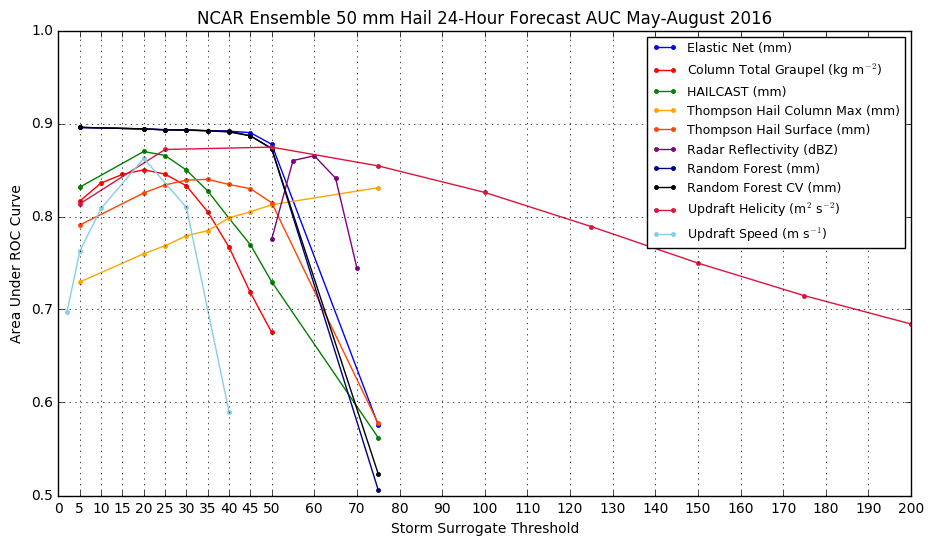

In [139]:
plt.figure(figsize=(11, 6))
colors = ["blue", "red", "green", "orange", "orangered", "purple", "navy", "black", "crimson", "skyblue"]
units = {"NCAR_Elastic-Net": "mm",
         "NCAR_Random-Forest": "mm",
         "NCAR_Random-Forest-CV": "mm",
         "NCAR_GRPL_MAX": "kg m$^{-2}$",
         "NCAR_HAILCAST_DIAM_MEAN": "mm",
         "NCAR_HAIL_MAX2D": "mm",
         "NCAR_HAIL_MAXK1": "mm",
         "NCAR_REFD_MAX": "dBZ",
         "NCAR_UP_HELI_MAX": "m$^2$ s$^{-2}$",
         "NCAR_W_UP_MAX": "m s$^{-1}$"
        }
long_names = {"NCAR_Elastic-Net": "Elastic Net",
         "NCAR_Random-Forest": "Random Forest",
         "NCAR_Random-Forest-CV": "Random Forest CV",
         "NCAR_GRPL_MAX": "Column Total Graupel",
         "NCAR_HAILCAST_DIAM_MEAN": "HAILCAST",
         "NCAR_HAIL_MAX2D": "Thompson Hail Column Max",
         "NCAR_HAIL_MAXK1": "Thompson Hail Surface",
         "NCAR_REFD_MAX": "Radar Reflectivity",
         "NCAR_UP_HELI_MAX": "Updraft Helicity",
         "NCAR_W_UP_MAX": "Updraft Speed"
        }
unique_model_names = np.sort(np.unique(model_names))
for m, model_name in enumerate(unique_model_names):
    print(model_name)
    print(thresholds[model_names == model_name])
    plt.plot(np.array(thresholds[model_names == model_name], dtype=float), 
             auc_50[model_names == model_name], label=long_names[model_name] + " ({0})".format(units[model_name]), 
             marker='.', color=colors[m])
    plt.plot(np.arange(200), np.zeros(200), 'k--')
plt.legend(loc=1, fontsize=9)
plt.xticks(np.concatenate((np.arange(0, 55, 5), np.arange(60, 210, 10))))
plt.grid()
plt.ylim(0.5, 1)
plt.xlabel("Storm Surrogate Threshold")
plt.ylabel("Area Under ROC Curve")
plt.title("NCAR Ensemble 50 mm Hail 24-Hour Forecast AUC May-August 2016")
plt.savefig("ncar_ens_thresh_comp_auc_50.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_thresh_comp_auc_50.pdf", dpi=300, bbox_inches="tight")

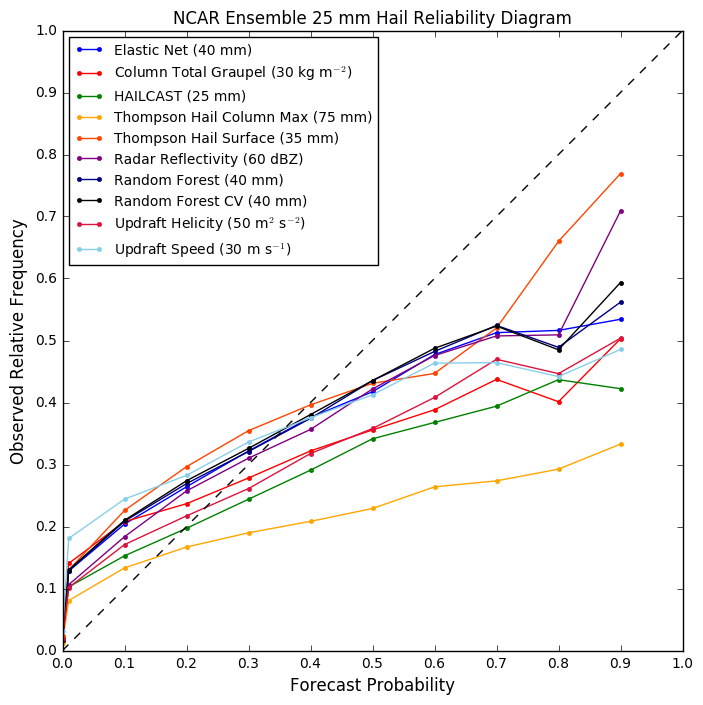

In [116]:
fig, ax = plt.subplots(figsize=(8, 8))
for m, model_name in enumerate(unique_model_names):
    max_thresh = thresholds[model_names == model_name][bss[model_names == model_name].values.argmax()]
    rel_objs.loc[model_name + "_mean_" + max_thresh].reliability_curve().plot(x="Bin_Start", 
                                                                              y="Positive_Relative_Freq",
                                                                             color=colors[m],
                                                                             marker='.',
                                                                              ax=ax,
                                                                             xlim=(0, 1),
                                                                             ylim=(0, 1),
                                                                             label=long_names[model_name] + " ({0} {1})".format(max_thresh, units[model_name]))
plt.xlabel("Forecast Probability", fontsize=12)
plt.ylabel("Observed Relative Frequency", fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), 'k--')
plt.legend(loc=0, fontsize=10)
plt.title("NCAR Ensemble 25 mm Hail Reliability Diagram")
plt.savefig("ncar_ens_rel_diag_25.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_rel_diag_25.pdf", dpi=300, bbox_inches="tight")

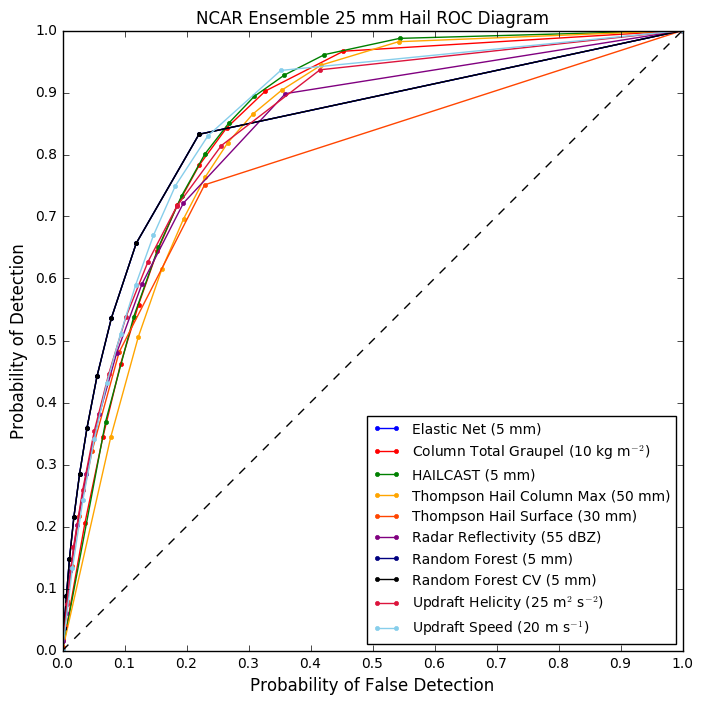

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))
for m, model_name in enumerate(unique_model_names):
    max_thresh = thresholds[model_names == model_name][auc[model_names == model_name].values.argmax()]
    roc_objs.loc[model_name + "_mean_" + max_thresh].roc_curve().plot(x="POFD", 
                                                                      y="POD",
                                                                             color=colors[m],
                                                                             marker='.',
                                                                              ax=ax,
                                                                             xlim=(0, 1),
                                                                             ylim=(0, 1),
                                                                             label=long_names[model_name] + " ({0} {1})".format(max_thresh, units[model_name]))
plt.xlabel("Probability of False Detection", fontsize=12)
plt.ylabel("Probability of Detection", fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), 'k--')
plt.legend(loc=0, fontsize=10)
plt.title("NCAR Ensemble 25 mm Hail ROC Diagram")
plt.savefig("ncar_ens_roc_diag_25.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_roc_diag_25.pdf", dpi=300, bbox_inches="tight")

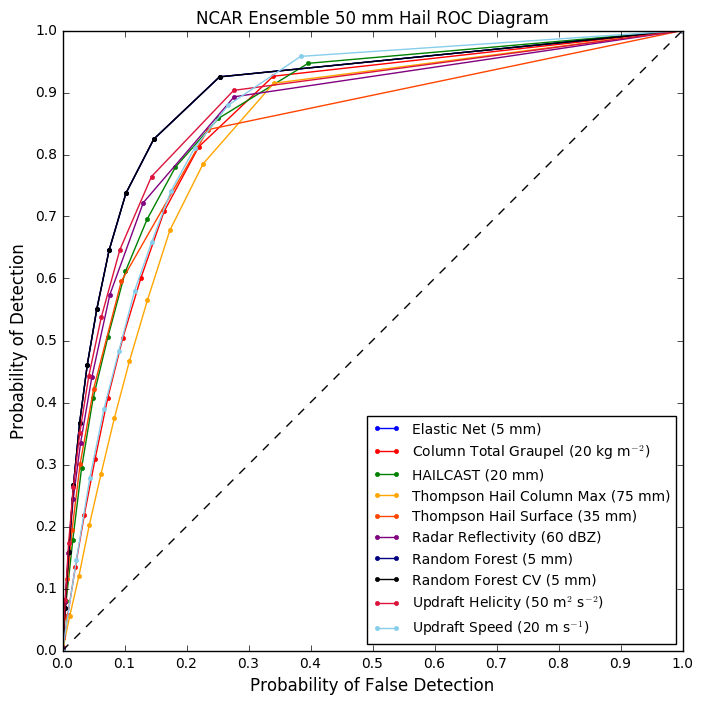

In [142]:
fig, ax = plt.subplots(figsize=(8, 8))
for m, model_name in enumerate(unique_model_names):
    max_thresh = thresholds[model_names == model_name][auc_50[model_names == model_name].values.argmax()]
    roc_objs_50.loc[model_name + "_mean_" + max_thresh].roc_curve().plot(x="POFD", 
                                                                      y="POD",
                                                                             color=colors[m],
                                                                             marker='.',
                                                                              ax=ax,
                                                                             xlim=(0, 1),
                                                                             ylim=(0, 1),
                                                                             label=long_names[model_name] + " ({0} {1})".format(max_thresh, units[model_name]))
plt.xlabel("Probability of False Detection", fontsize=12)
plt.ylabel("Probability of Detection", fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), 'k--')
plt.legend(loc=0, fontsize=10)
plt.title("NCAR Ensemble 50 mm Hail ROC Diagram")
plt.savefig("ncar_ens_roc_diag_50.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_roc_diag_50.pdf", dpi=300, bbox_inches="tight")

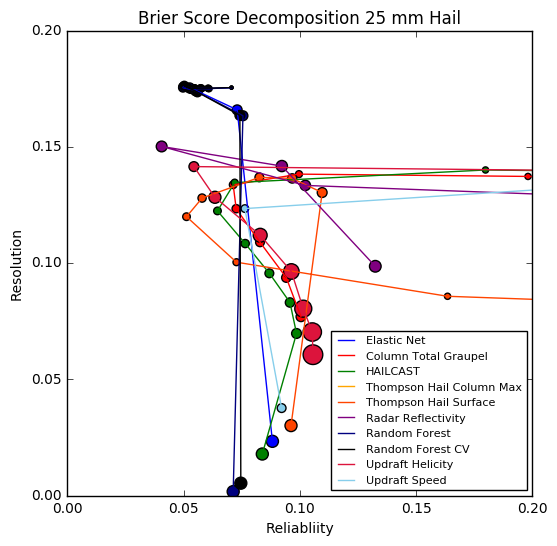

In [134]:
plt.figure(figsize=(6, 6))
for m, model_name in enumerate(unique_model_names):
    num_thresh = np.count_nonzero(model_names == model_name)
    model_thresh = thresholds[model_names == model_name]
    bs_comps = np.zeros((num_thresh, 3))
    for t in range(num_thresh):
        bs_comps[t] = rel_objs.loc[model_name + "_mean_" + model_thresh[t]].brier_score_components()
    plt.plot(bs_comps[:, 0] / bs_comps[:, 2], bs_comps[:, 1] / bs_comps[:, 2], 
             label=long_names[model_name], marker='', color=colors[m])
    plt.scatter(bs_comps[:, 0] / bs_comps[:, 2], bs_comps[:, 1] / bs_comps[:, 2], model_thresh.astype(float), colors[m],
             )
plt.xlim(0, 0.2)
plt.ylim(0, 0.2)
plt.legend(loc=0, fontsize=8)
plt.xlabel("Reliabliity")
plt.ylabel("Resolution")
plt.title("Brier Score Decomposition 25 mm Hail")
plt.savefig("ncar_ens_bs_decomp.pdf", bbox_inches="tight")

In [32]:
total_freqs = np.zeros(len(rel_objs),dtype=int)
for r, ro in enumerate(rel_objs_50.values):
    total_freqs[r] = ro.frequencies["Total_Freq"].sum()
    if total_freqs[r] < 473368:
        print(rel_objs.index[r], total_freqs[r])

In [64]:
total_freqs

array([441929, 469914, 471101, 472059, 472439, 472987, 473169, 473283,
       473368, 473071, 473368, 473368, 473368, 473368, 473368, 473368,
       473368, 473368, 473288, 473368, 473368, 473368, 473368, 473368,
       473368, 473368, 473368, 473296, 473362, 473368, 473368, 473368,
       473368, 473368, 473368, 473368, 473368, 473329, 473368, 473368,
       473368, 473368, 473368, 473368, 473368, 473368, 445254, 469766,
       472961, 473361, 473368, 473368, 473295, 473368, 473368, 473368,
       473368, 473368, 473368, 473368, 473368, 473368, 473368, 473368,
       473368, 473368, 473368, 473368, 473368, 473368, 473368, 473368,
       473368, 473368, 473368, 473368, 473368, 473368, 473368, 473368,
       473368, 473368, 473368, 473368])

In [51]:
ro = rel_objs.iloc[6]
rc = rel_objs.iloc[6].reliability_curve()
print ro.brier_score_components()
print ro.frequencies["Total_Freq"].sum()
print np.sum(ro.frequencies["Total_Freq"] * (rc["Bin_Start"] - rc["Positive_Relative_Freq"]) ** 2) / ro.frequencies["Total_Freq"].sum()

(0.11235548880560145, 0.006150279667051211, 0.06088900772688263)
473169
0.112355488806


In [117]:
bss_50 = brier[50].sum(axis=0).apply(DistributedReliability.brier_skill_score)
rel_objs_50 = brier[50].sum(axis=0)

NCAR_Elastic-Net
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_GRPL_MAX
['5' '10' '15' '20' '25' '30' '35' '40' '45' '50']
NCAR_HAILCAST_DIAM_MEAN
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAX2D
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_HAIL_MAXK1
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_REFD_MAX
['50' '55' '60' '65' '70']
NCAR_Random-Forest
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_Random-Forest-CV
['5' '20' '25' '30' '35' '40' '45' '50' '75']
NCAR_UP_HELI_MAX
['5' '25' '50' '75' '100' '125' '150' '175' '200']
NCAR_W_UP_MAX
['2' '5' '10' '20' '30' '40']


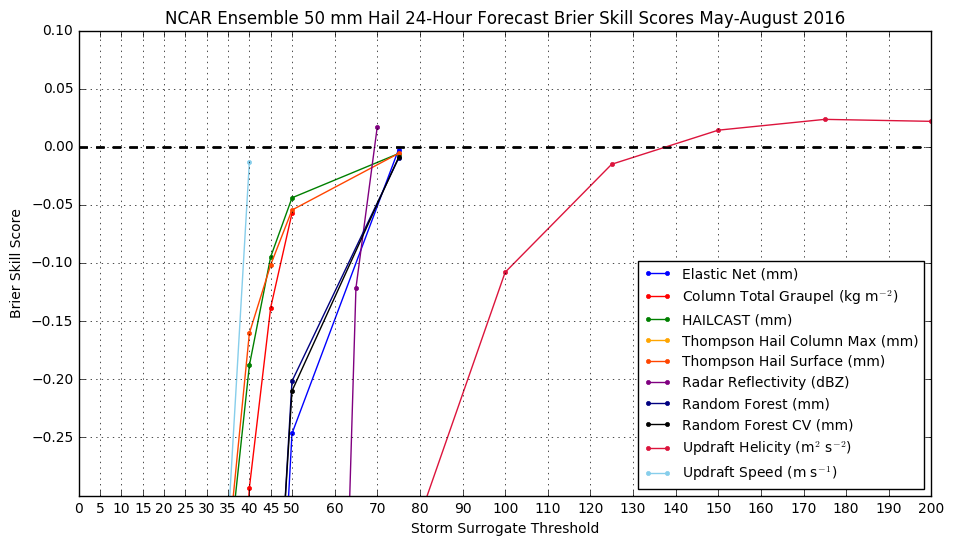

In [118]:
plt.figure(figsize=(11, 6))
for m, model_name in enumerate(unique_model_names):
    print(model_name)
    print(thresholds[model_names == model_name])
    plt.plot(np.array(thresholds[model_names == model_name], dtype=float), 
             bss_50[model_names == model_name], label=long_names[model_name] + " ({0})".format(units[model_name]), 
             marker='.', color=colors[m])
    plt.plot(np.arange(200), np.zeros(200), 'k--')
plt.legend(loc=4, fontsize=10)
plt.xticks(np.concatenate((np.arange(0, 55, 5), np.arange(60, 210, 10))))
plt.grid()
plt.ylim(-0.3, 0.1)
plt.xlabel("Storm Surrogate Threshold")
plt.ylabel("Brier Skill Score")
plt.title("NCAR Ensemble 50 mm Hail 24-Hour Forecast Brier Skill Scores May-August 2016")
plt.savefig("ncar_ens_thresh_comp_bss_50.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_thresh_comp_bss_50.pdf", dpi=300, bbox_inches="tight")

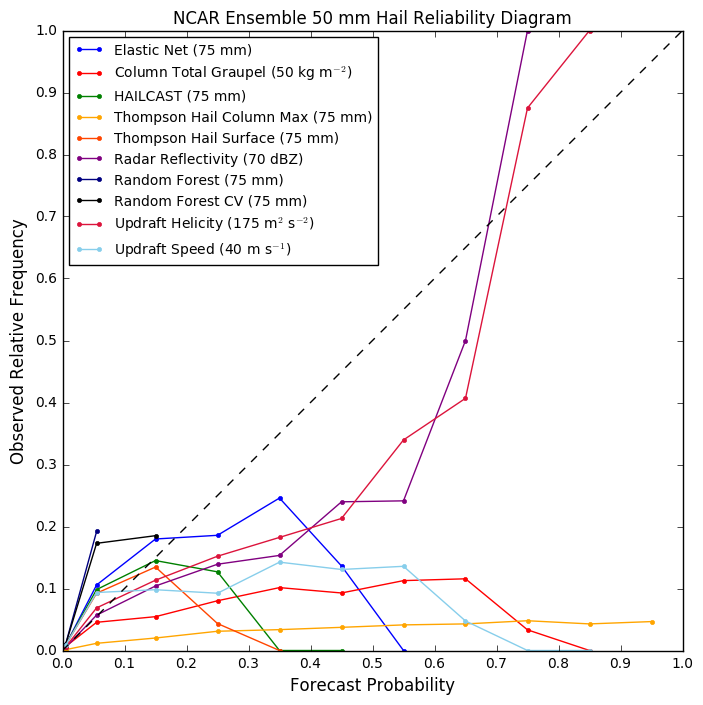

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
for m, model_name in enumerate(unique_model_names):
    max_thresh = thresholds[model_names == model_name][bss_50[model_names == model_name].values.argmax()]
    rel_objs_50.loc[model_name + "_mean_" + max_thresh].reliability_curve().plot(x="Bin_Center", 
                                                                              y="Positive_Relative_Freq",
                                                                             color=colors[m],
                                                                             marker='.',
                                                                              ax=ax,
                                                                             xlim=(0, 1),
                                                                             ylim=(0, 1),
                                                                             label=long_names[model_name] + " ({0} {1})".format(max_thresh, units[model_name]))
plt.xlabel("Forecast Probability", fontsize=12)
plt.ylabel("Observed Relative Frequency", fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), 'k--')
plt.legend(loc=0, fontsize=10)
plt.title("NCAR Ensemble 50 mm Hail Reliability Diagram")
plt.savefig("ncar_ens_rel_diag_50.png", dpi=300, bbox_inches="tight")
plt.savefig("ncar_ens_rel_diag_50.pdf", dpi=300, bbox_inches="tight")

In [120]:
daily_bss = pd.DataFrame(index=brier[25].index, columns=brier[25].columns)
def brier_skill_score(obj):
    try:
        return DistributedReliability.brier_skill_score(obj)
    except ZeroDivisionError:
        return np.nan
for col in daily_bss:
    daily_bss.loc[:, col] = brier[25][col].apply(brier_skill_score)

In [124]:
daily_bss

,NCAR_HAIL_MAX2D_mean_5,NCAR_HAIL_MAX2D_mean_20,NCAR_HAIL_MAX2D_mean_25,NCAR_HAIL_MAX2D_mean_30,NCAR_HAIL_MAX2D_mean_35,NCAR_HAIL_MAX2D_mean_40,NCAR_HAIL_MAX2D_mean_45,NCAR_HAIL_MAX2D_mean_50,NCAR_HAIL_MAX2D_mean_75,NCAR_HAIL_MAXK1_mean_5,...,NCAR_Elastic-Net_mean_75,NCAR_Random-Forest-CV_mean_5,NCAR_Random-Forest-CV_mean_20,NCAR_Random-Forest-CV_mean_25,NCAR_Random-Forest-CV_mean_30,NCAR_Random-Forest-CV_mean_35,NCAR_Random-Forest-CV_mean_40,NCAR_Random-Forest-CV_mean_45,NCAR_Random-Forest-CV_mean_50,NCAR_Random-Forest-CV_mean_75
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-02,-7.189639,-3.270793,-2.543755,-1.769930,-1.440473,-0.876362,-0.640854,-0.417216,0.365567,-1.444042,...,-0.048590,0.398628,0.409983,0.411566,0.422053,0.436014,0.451408,0.450255,0.415124,-0.048590
2016-05-03,-7.732068,-3.666396,-2.698834,-1.620488,-1.156262,-0.429632,-0.116988,0.121119,0.436986,-0.682004,...,-0.033886,0.440492,0.441488,0.439707,0.434146,0.442201,0.424018,0.384651,0.319216,-0.033886
2016-05-04,-19.893485,-13.280084,-11.496387,-9.117497,-7.763323,-5.019959,-3.294380,-1.917240,-0.317387,-7.129334,...,-0.014446,-0.207453,-0.199069,-0.185374,-0.174412,-0.164755,-0.116926,-0.051807,0.015536,-0.014446
2016-05-05,-27.987419,-16.942550,-13.289572,-8.666233,-6.640694,-3.512229,-2.320207,-1.159874,0.037385,-10.198157,...,-0.011662,0.045256,0.036528,0.037330,0.038125,0.039514,0.030189,0.025491,0.032698,-0.011662
2016-05-06,-12.793825,-8.239850,-6.949228,-5.002362,-3.876317,-1.822522,-0.922886,-0.395987,-0.028207,-5.559074,...,-0.028837,-0.027029,-0.028361,-0.027044,-0.026711,-0.023812,-0.024214,-0.028354,-0.028640,-0.028837
2016-05-07,-18.712853,-11.122744,-9.118044,-5.941124,-4.261661,-1.903663,-1.069529,-0.457827,0.058731,-5.974398,...,-0.024548,0.231822,0.231447,0.226413,0.215678,0.200885,0.195269,0.178255,0.142426,-0.024548
2016-05-08,-8.463085,-4.644323,-3.539613,-2.112258,-1.546683,-0.640193,-0.264794,0.026653,0.246681,-2.813343,...,-0.056604,0.339331,0.321149,0.310315,0.296050,0.287847,0.280528,0.259584,0.219427,-0.056604
2016-05-09,-10.016884,-5.720819,-4.518306,-3.327914,-2.800581,-1.860338,-1.395414,-1.001812,0.302627,-2.899671,...,-0.052331,0.350838,0.362705,0.357586,0.345005,0.339601,0.333717,0.293295,0.201015,-0.052331
2016-05-10,-5.986764,-2.764805,-2.093056,-1.513559,-1.272013,-0.916577,-0.733997,-0.494149,0.218865,-2.027769,...,-0.064731,0.276642,0.277423,0.284709,0.279225,0.277617,0.256735,0.227404,0.166899,-0.064731


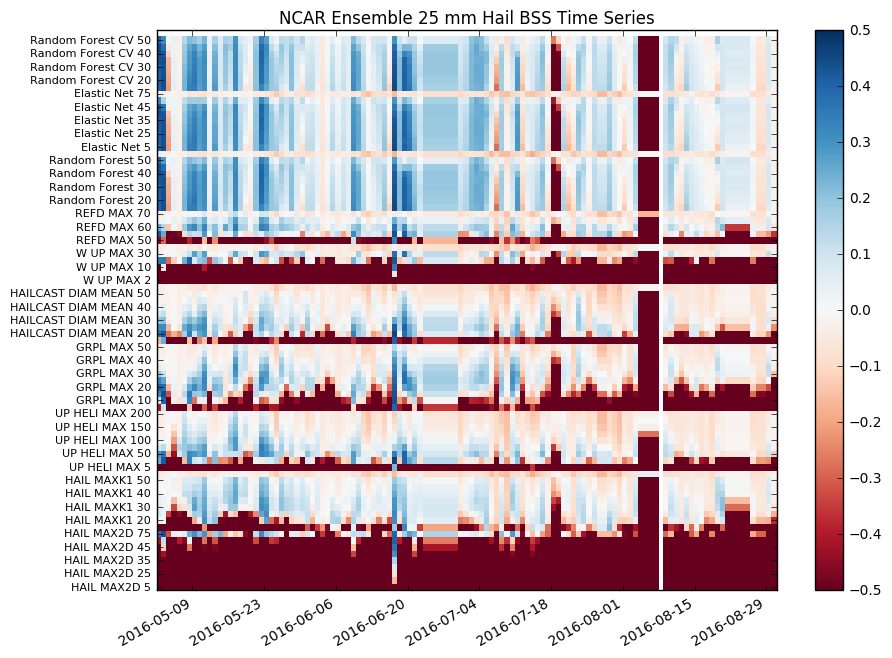

In [123]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10, 8))
plt.pcolormesh(daily_bss.index, np.arange(0, daily_bss.shape[1]), 
               np.ma.array(daily_bss.values.T, mask=np.isnan(daily_bss.values.T)), vmin=-0.5, vmax=0.5, cmap="RdBu")
#plt.xticks(np.arange(0, daily_bss.shape[0] + 7, 7), daily_bss.index[::7], rotation=90)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.ylim(0, daily_bss.shape[1])
plt.yticks(np.arange(0.5, daily_bss.shape[1], 2), 
           daily_bss.columns[::2].str.replace("NCAR_", "").str.replace("_", " ").str.replace("mean ", "").str.replace("-", " "), fontsize=8)
plt.title("NCAR Ensemble 25 mm Hail BSS Time Series")
fig.autofmt_xdate()
plt.colorbar()
plt.savefig("ncar_bss_hail_ts.png", dpi=300, bbox_inches="tight")

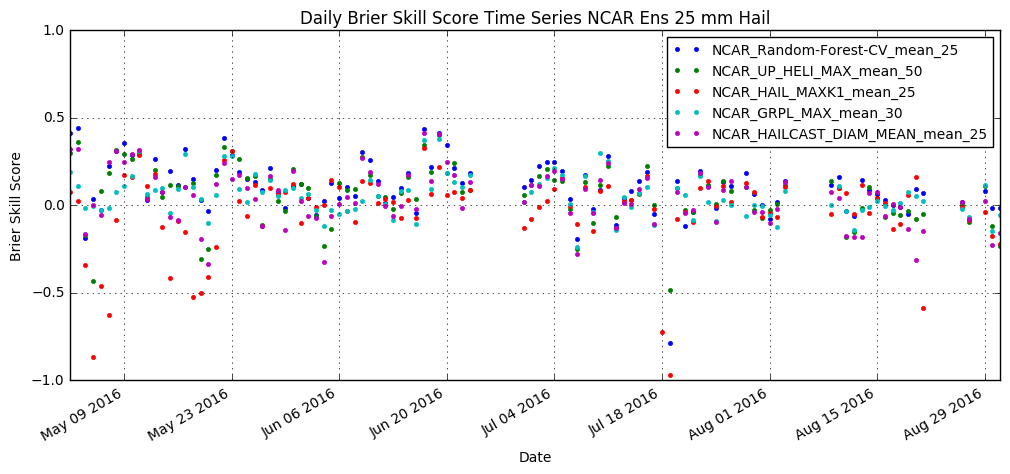

In [136]:
fig, ax = plt.subplots(figsize=(12, 5))
daily_bss.plot(y=["NCAR_Random-Forest-CV_mean_25", "NCAR_UP_HELI_MAX_mean_50", "NCAR_HAIL_MAXK1_mean_25", 
                  "NCAR_GRPL_MAX_mean_30", "NCAR_HAILCAST_DIAM_MEAN_mean_25"],
               ax=ax, marker='.', linestyle="")
plt.ylim(-1, 1)
plt.legend(loc=0, fontsize=10)
plt.grid()
plt.ylabel("Brier Skill Score")
plt.xlabel("Date")
plt.title("Daily Brier Skill Score Time Series NCAR Ens 25 mm Hail")
plt.savefig("ncar_bss_ts_hail_25.pdf", dpi=300, bbox_inches="tight")

In [125]:
eval_path = "/glade/p/work/dgagne/ncar_coarse_neighbor_eval_2016/"

eval_day = pd.read_csv(join(eval_path, "coarse_neighbor_eval_NCAR_20160804.csv"))


In [42]:
rows = eval_day.i_small.max()  + 1
cols = eval_day.j_small.max() + 1

In [81]:
dr = DistributedReliability()


In [39]:
bmap = Basemap(projection="lcc", resolution="l", lat_0=39, lon_0=-101, lat_1=32, lat_2=46,
               llcrnrlon=-120.81, llcrnrlat=23.159264, urcrnrlon=-65.02124, urcrnrlat=46.88567)

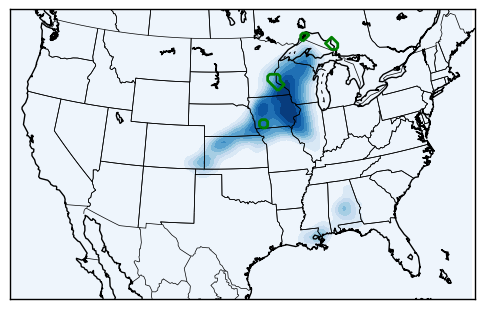

In [128]:
bmap.drawstates()
bmap.drawcountries()
bmap.drawcoastlines()
lons = eval_day.lon.values.reshape(rows, cols)
lats = eval_day.lat.values.reshape(rows, cols)
x, y = bmap(lons, lats)
plt.contourf(x,y, eval_day["NCAR_Random-Forest-CV_mean_25"].values.reshape(rows, cols), np.arange(0, 1.1, 0.1), cmap="Blues")
plt.contour(x,y, eval_day["MESH_Max_60min_00.50_25"].values.reshape(rows, cols), [0.5], colors="green", linewidths=2)

In [130]:
eval_day["NCAR_HAIL_MAX2D_mean_25"].values[eval_day["us_mask"].values == 1].max()

1.0

In [50]:
for col in eval_day.columns:
    print(col)

i
i_small
j
j_small
lat
lon
us_mask
x
y
Run_Date
Start_Date
End_Date
MESH_Max_60min_00.50_25
MESH_Max_60min_00.50_50
MESH_Max_60min_00.50_75
NCAR_HAIL_MAX2D_mem1_5
NCAR_HAIL_MAX2D_mem1_20
NCAR_HAIL_MAX2D_mem1_25
NCAR_HAIL_MAX2D_mem1_30
NCAR_HAIL_MAX2D_mem1_35
NCAR_HAIL_MAX2D_mem1_40
NCAR_HAIL_MAX2D_mem1_45
NCAR_HAIL_MAX2D_mem1_50
NCAR_HAIL_MAX2D_mem1_75
NCAR_HAIL_MAX2D_mem2_5
NCAR_HAIL_MAX2D_mem2_20
NCAR_HAIL_MAX2D_mem2_25
NCAR_HAIL_MAX2D_mem2_30
NCAR_HAIL_MAX2D_mem2_35
NCAR_HAIL_MAX2D_mem2_40
NCAR_HAIL_MAX2D_mem2_45
NCAR_HAIL_MAX2D_mem2_50
NCAR_HAIL_MAX2D_mem2_75
NCAR_HAIL_MAX2D_mem3_5
NCAR_HAIL_MAX2D_mem3_20
NCAR_HAIL_MAX2D_mem3_25
NCAR_HAIL_MAX2D_mem3_30
NCAR_HAIL_MAX2D_mem3_35
NCAR_HAIL_MAX2D_mem3_40
NCAR_HAIL_MAX2D_mem3_45
NCAR_HAIL_MAX2D_mem3_50
NCAR_HAIL_MAX2D_mem3_75
NCAR_HAIL_MAX2D_mem4_5
NCAR_HAIL_MAX2D_mem4_20
NCAR_HAIL_MAX2D_mem4_25
NCAR_HAIL_MAX2D_mem4_30
NCAR_HAIL_MAX2D_mem4_35
NCAR_HAIL_MAX2D_mem4_40
NCAR_HAIL_MAX2D_mem4_45
NCAR_HAIL_MAX2D_mem4_50
NCAR_HAIL_MAX2D_mem4_75

In [46]:
eval_day.columns[eval_day.columns.str.contains("mean")]

Index([u'NCAR_HAIL_MAX2D_mean_5', u'NCAR_HAIL_MAX2D_mean_20',
       u'NCAR_HAIL_MAX2D_mean_25', u'NCAR_HAIL_MAX2D_mean_30',
       u'NCAR_HAIL_MAX2D_mean_35', u'NCAR_HAIL_MAX2D_mean_40',
       u'NCAR_HAIL_MAX2D_mean_45', u'NCAR_HAIL_MAX2D_mean_50',
       u'NCAR_HAIL_MAX2D_mean_75', u'NCAR_HAIL_MAXK1_mean_5',
       u'NCAR_HAIL_MAXK1_mean_20', u'NCAR_HAIL_MAXK1_mean_25',
       u'NCAR_HAIL_MAXK1_mean_30', u'NCAR_HAIL_MAXK1_mean_35',
       u'NCAR_HAIL_MAXK1_mean_40', u'NCAR_HAIL_MAXK1_mean_45',
       u'NCAR_HAIL_MAXK1_mean_50', u'NCAR_HAIL_MAXK1_mean_75',
       u'NCAR_UP_HELI_MAX_mean_5', u'NCAR_UP_HELI_MAX_mean_25',
       u'NCAR_UP_HELI_MAX_mean_50', u'NCAR_UP_HELI_MAX_mean_75',
       u'NCAR_UP_HELI_MAX_mean_100', u'NCAR_UP_HELI_MAX_mean_125',
       u'NCAR_UP_HELI_MAX_mean_150', u'NCAR_UP_HELI_MAX_mean_175',
       u'NCAR_UP_HELI_MAX_mean_200', u'NCAR_GRPL_MAX_mean_5',
       u'NCAR_GRPL_MAX_mean_10', u'NCAR_GRPL_MAX_mean_15',
       u'NCAR_GRPL_MAX_mean_20', u'NCAR_GRPL_MAX_me

In [109]:
eval_day.columns

Index([u'i', u'i_small', u'j', u'j_small', u'lat', u'lon', u'us_mask', u'x',
       u'y', u'Run_Date',
       ...
       u'NCAR_Random-Forest-CV_mem2_75', u'NCAR_Random-Forest-CV_mem3_75',
       u'NCAR_Random-Forest-CV_mem4_75', u'NCAR_Random-Forest-CV_mem5_75',
       u'NCAR_Random-Forest-CV_mem6_75', u'NCAR_Random-Forest-CV_mem7_75',
       u'NCAR_Random-Forest-CV_mem8_75', u'NCAR_Random-Forest-CV_mem9_75',
       u'NCAR_Random-Forest-CV_mem10_75', u'NCAR_Random-Forest-CV_mean_75'],
      dtype='object', length=939)

In [37]:
spatial_models = ["NCAR_Random-Forest-CV_mean_25", "NCAR_HAILCAST_DIAM_MEAN_mean_25", "NCAR_HAIL_MAXK1_mean_25", 
                  "NCAR_GRPL_MAX_mean_30", "NCAR_UP_HELI_MAX_mean_50", "NCAR_W_UP_MAX_mean_30"]
verif_var = "MESH_Max_60min_00.50_25"
eval_path = "/glade/p/work/dgagne/ncar_coarse_neighbor_eval_2016/"
eval_files = sorted(os.listdir(eval_path))
eval_test = pd.read_csv(join(eval_path, eval_files[0]))
rows = eval_test.i_small.max()  + 1
cols = eval_test.j_small.max() + 1
lon = eval_test.lon.reshape((rows, cols))
lat = eval_test.lat.reshape((rows, cols))
#models = eval_test.columns[eval_test.columns.str.contains("mean")]
run_dates = pd.DatetimeIndex([e.split("_")[-1][:8] for e in eval_files])
spatial_data = {}
for model in spatial_models:
    spatial_data[model] = np.zeros((len(run_dates), rows, cols))
spatial_verif = np.zeros((len(run_dates), rows, cols))
for e, eval_file in enumerate(eval_files):
    print(eval_file)
    eval_data = pd.read_csv(join(eval_path, eval_file))
    spatial_verif[e] = eval_data[verif_var].values.reshape(rows, cols)
    for model in spatial_models:
        spatial_data[model][e] = eval_data[model].values.reshape(rows, cols)

/glade/p/work/dgagne/miniconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/glade/p/work/dgagne/miniconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


coarse_neighbor_eval_NCAR_20160502.csv
coarse_neighbor_eval_NCAR_20160503.csv
coarse_neighbor_eval_NCAR_20160504.csv
coarse_neighbor_eval_NCAR_20160505.csv
coarse_neighbor_eval_NCAR_20160506.csv
coarse_neighbor_eval_NCAR_20160507.csv
coarse_neighbor_eval_NCAR_20160508.csv
coarse_neighbor_eval_NCAR_20160509.csv
coarse_neighbor_eval_NCAR_20160510.csv
coarse_neighbor_eval_NCAR_20160511.csv
coarse_neighbor_eval_NCAR_20160512.csv
coarse_neighbor_eval_NCAR_20160513.csv
coarse_neighbor_eval_NCAR_20160514.csv
coarse_neighbor_eval_NCAR_20160515.csv
coarse_neighbor_eval_NCAR_20160516.csv
coarse_neighbor_eval_NCAR_20160517.csv
coarse_neighbor_eval_NCAR_20160518.csv
coarse_neighbor_eval_NCAR_20160519.csv
coarse_neighbor_eval_NCAR_20160520.csv
coarse_neighbor_eval_NCAR_20160521.csv
coarse_neighbor_eval_NCAR_20160522.csv
coarse_neighbor_eval_NCAR_20160523.csv
coarse_neighbor_eval_NCAR_20160524.csv
coarse_neighbor_eval_NCAR_20160525.csv
coarse_neighbor_eval_NCAR_20160526.csv
coarse_neighbor_eval_NCAR

('NCAR_Random-Forest-CV_mean_25', 898)
('NCAR_HAILCAST_DIAM_MEAN_mean_25', 906)
('NCAR_HAIL_MAXK1_mean_25', 1248)
('NCAR_GRPL_MAX_mean_30', 650)
('NCAR_UP_HELI_MAX_mean_50', 807)
('NCAR_W_UP_MAX_mean_30', 481)


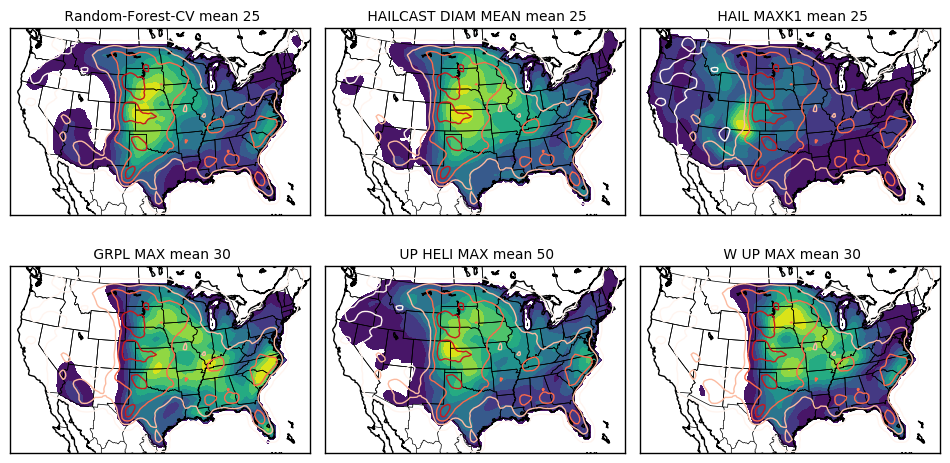

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
print(axes.ravel())
x, y = bmap(lon, lat)
us_mask = eval_test.us_mask.values.reshape(rows, cols)
verif_sum = convolve(spatial_verif.sum(axis=0) * us_mask, np.ones((5,5)))
for m, model in enumerate(spatial_models):
    bmap.drawstates(ax=axes.ravel()[m])
    bmap.drawcoastlines(ax=axes.ravel()[m])
    bmap.drawcountries(ax=axes.ravel()[m])
    spatial_sum = convolve(np.where(spatial_data[model]  * us_mask > 0.2, 1, 0).sum(axis=0), np.ones((5,5)))
    print(model, spatial_sum.max())
    axes.ravel()[m].contourf(x, y, spatial_sum * us_mask,np.linspace(20, spatial_sum.max(), 10), cmap="viridis", extend="max")
    axes.ravel()[m].set_title(model.replace("NCAR", "").replace("_", " "), fontsize=10)
    axes.ravel()[m].contour(x, y, verif_sum, 
                            np.linspace(20, verif_sum.max(), 5), cmap="Reds")
#bmap.drawstates(ax=axes.ravel()[-1])
#bmap.drawcoastlines(ax=axes.ravel()[-1])
#bmap.drawcountries(ax=axes.ravel()[-1])
#
#axes.ravel()[-1].set_title("MESH 25 mm")
plt.savefig("ncar_hail_spatial_counts.png", dpi=300, bbox_inches="tight")

('NCAR_Random-Forest-CV_mean_25', 420)
('NCAR_HAILCAST_DIAM_MEAN_mean_25', 445)
('NCAR_HAIL_MAXK1_mean_25', 493)
('NCAR_GRPL_MAX_mean_30', 343)
('NCAR_UP_HELI_MAX_mean_50', 404)
('NCAR_W_UP_MAX_mean_30', 296)


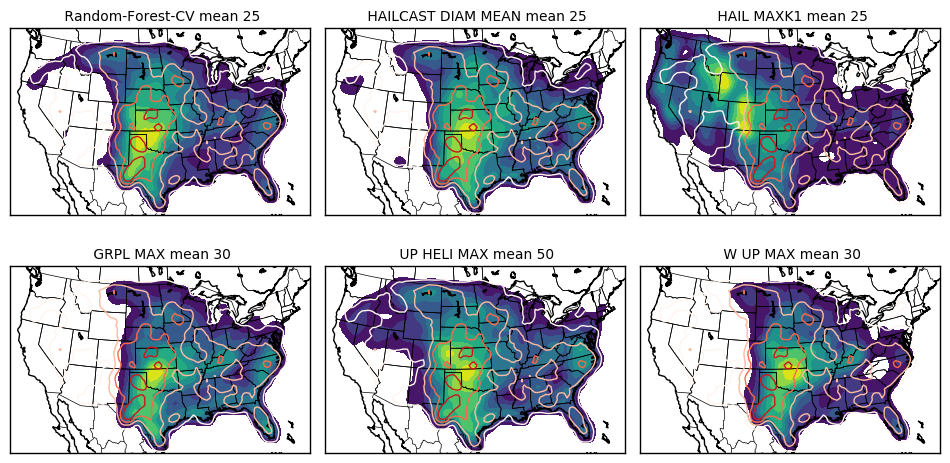

In [103]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
print(axes.ravel())
x, y = bmap(lon, lat)
us_mask = eval_test.us_mask.values.reshape(rows, cols)
verif_sum = convolve(spatial_verif[run_dates.month < 7].sum(axis=0) * us_mask, np.ones((5,5)))
for m, model in enumerate(spatial_models):
    bmap.drawstates(ax=axes.ravel()[m])
    bmap.drawcoastlines(ax=axes.ravel()[m])
    bmap.drawcountries(ax=axes.ravel()[m])
    spatial_sum = convolve(np.where(spatial_data[model][run_dates.month < 7]  * us_mask > 0.2, 1, 0).sum(axis=0), np.ones((5,5)))
    print(model, spatial_sum.max())
    axes.ravel()[m].contourf(x, y, spatial_sum,np.linspace(20, spatial_sum.max(), 10), cmap="viridis", extend="max")
    axes.ravel()[m].set_title(model.replace("NCAR", "").replace("_", " "), fontsize=10)
    axes.ravel()[m].contour(x, y, verif_sum, 
                            np.linspace(20, verif_sum.max(), 5), cmap="Reds")
#bmap.drawstates(ax=axes.ravel()[-1])
#bmap.drawcoastlines(ax=axes.ravel()[-1])
#bmap.drawcountries(ax=axes.ravel()[-1])
#
#axes.ravel()[-1].set_title("MESH 25 mm")
plt.savefig("ncar_hail_spatial_counts_may_june.png", dpi=300, bbox_inches="tight")

('NCAR_Random-Forest-CV_mean_25', 599)
('NCAR_HAILCAST_DIAM_MEAN_mean_25', 567)
('NCAR_HAIL_MAXK1_mean_25', 780)
('NCAR_GRPL_MAX_mean_30', 472)
('NCAR_UP_HELI_MAX_mean_50', 471)
('NCAR_W_UP_MAX_mean_30', 353)


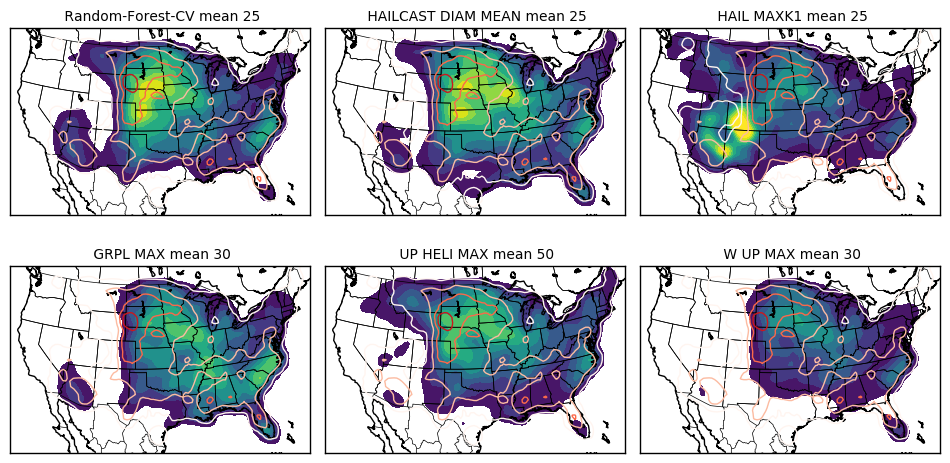

In [108]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
plt.subplots_adjust(hspace=0.05, wspace=0.05)
print(axes.ravel())
x, y = bmap(lon, lat)
us_mask = eval_test.us_mask.values.reshape(rows, cols)
verif_sum = convolve(spatial_verif[run_dates.month > 6].sum(axis=0) * us_mask, np.ones((5,5)))
for m, model in enumerate(spatial_models):
    bmap.drawstates(ax=axes.ravel()[m])
    bmap.drawcoastlines(ax=axes.ravel()[m])
    bmap.drawcountries(ax=axes.ravel()[m])
    spatial_sum = convolve(np.where(spatial_data[model][run_dates.month > 6]  * us_mask > 0.2, 1, 0).sum(axis=0), np.ones((5,5)))
    print(model, spatial_sum.max())
    axes.ravel()[m].contourf(x, y, spatial_sum,np.linspace(20, 600, 10), cmap="viridis", extend="max")
    axes.ravel()[m].set_title(model.replace("NCAR", "").replace("_", " "), fontsize=10)
    axes.ravel()[m].contour(x, y, verif_sum, 
                            np.linspace(20, 400, 5), cmap="Reds")
#bmap.drawstates(ax=axes.ravel()[-1])
#bmap.drawcoastlines(ax=axes.ravel()[-1])
#bmap.drawcountries(ax=axes.ravel()[-1])
#
#axes.ravel()[-1].set_title("MESH 25 mm")
plt.savefig("ncar_hail_spatial_counts_july_august.png", dpi=300, bbox_inches="tight")

/glade/p/work/dgagne/miniconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/glade/p/work/dgagne/miniconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


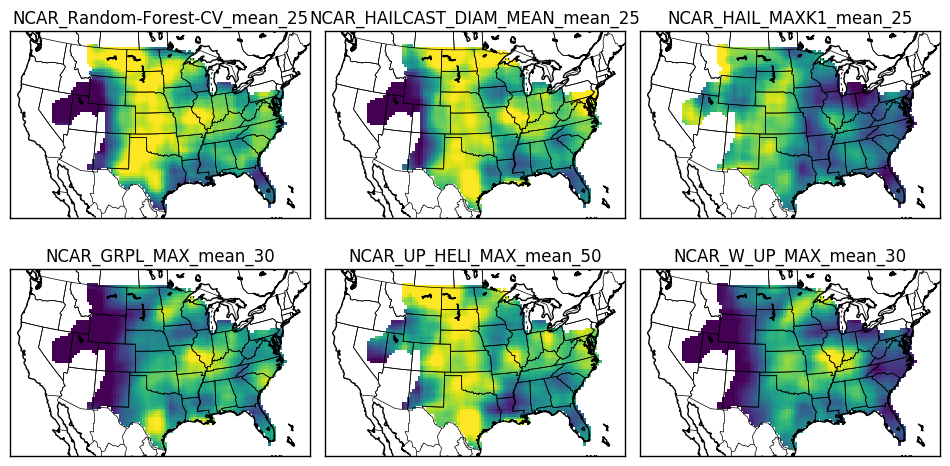

In [112]:
p_thresh = 0.3
weights = np.ones((9, 9))
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
ax_flat = axes.ravel()
plt.subplots_adjust(hspace=0.05, wspace=0.05)
for m, model in enumerate(spatial_models):
    hits = np.where((spatial_data[model][run_dates.month < 7] >= p_thresh) & (spatial_verif[run_dates.month < 7] == 1), 1, 0).sum(axis=0)
    false_alarms = np.where((spatial_data[model][run_dates.month < 7] >= p_thresh) & (spatial_verif[run_dates.month < 7] == 0), 1, 0).sum(axis=0)
    misses = np.where((spatial_data[model][run_dates.month < 7] < p_thresh) & (spatial_verif[run_dates.month < 7] == 1), 1, 0).sum(axis=0)
    tn = np.where((spatial_data[model][run_dates.month < 7] < p_thresh) & (spatial_verif[run_dates.month < 7] == 0), 1, 0).sum(axis=0)
    n_obs = convolve(spatial_verif[run_dates.month < 7].sum(axis=0), weights)
    pod = convolve(hits, weights) / convolve(hits + misses, weights).astype(float)
    far = convolve(false_alarms, weights) / convolve(hits + false_alarms, weights).astype(float)
    pofd = convolve(false_alarms, weights) / convolve(tn + false_alarms, weights).astype(float)
    bmap.drawstates(ax=ax_flat[m])
    bmap.drawcoastlines(ax=ax_flat[m])
    bmap.drawcountries(ax=ax_flat[m])
    ax_flat[m].set_title(model)
    ax_flat[m].pcolormesh(x, y, np.ma.array(pod - pofd, mask=(us_mask == 0) | (n_obs < 100)), vmin=0, vmax=0.5, cmap="viridis")

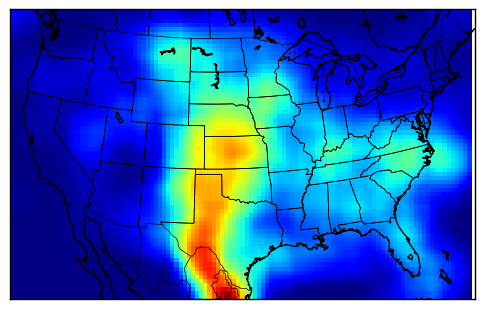

In [115]:
bmap.drawstates()
bmap.drawcoastlines()
bmap.drawcountries()
bmap.pcolormesh(x, y, n_obs)